***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
dados = pd.read_csv('dados.csv')
dados.head()

## <font color=green>1.2 Tipos de dados</font>
***

### Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas

In [ ]:
sorted(dados['Anos de Estudo'].unique())

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

In [ ]:
sorted(dados['UF'].unique())

In [ ]:
sorted(dados['Sexo'].unique())

In [ ]:
sorted(dados['Cor'].unique())

### Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

In [ ]:
print(f"Idade maxima: {dados['Idade'].max()}, Idade minima: {dados['Idade'].min()}")

#### <font color='red'>Observação</font>
***
> A variável idade pode ser classificada de três formas distintas:
> 1. <b>QUANTITATIVA DISCRETA</b> - quando representa anos completos (números inteiros);
> 2. <b>QUANTITATIVA CONTÍNUA</b> - quando representa a idade exata, sendo representado por frações de anos; e
> 3. <b>QUALITATIVA ORDINAL</b> - quando representa faixas de idade.

### Variáveis quantitativas contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

In [ ]:
print(f"Pessoa mais alta: {dados['Altura'].max()}, Pessoa mais baixa: {dados['Altura'].min()}")

### Classificação de uma variável
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img001.png' width='70%'>

# <font color=green>2 DISTRIBUIÇÃO DE FREQUÊNCIAS</font>
***

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## <font color=green>2.1 Distribuição de frequências para variáveis qualitativas</font>
***

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [ ]:
frequencia = dados['Sexo'].value_counts()
percentual = dados['Sexo'].value_counts(normalize=True) * 100
dist_freq_qualitativa = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativa.rename(index={0: 'Masculino', 1: 'Feminino'}, inplace=True)
dist_freq_qualitativa.rename_axis(None, axis=0, inplace=True)
dist_freq_qualitativa.rename_axis('Sexo', axis=1, inplace=True)
print(dist_freq_qualitativa)

### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [ ]:
sexo = {0: 'Masculino', 1: 'Feminino'}
cor = {0: 'Indígena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda', 9: 'Sem declaração'}

In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

In [ ]:
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize=True) * 100
percentual.rename(index=sexo, inplace=True)
percentual.rename(columns=cor, inplace=True)
percentual

In [ ]:
percentual = pd.crosstab(dados.Sexo, dados.Cor, aggfunc= 'mean', values=dados.Renda) * 100
percentual.rename(index=sexo, inplace=True)
percentual.rename(columns=cor, inplace=True)
percentual

## <font color=green>2.2 Distribuição de frequências para variáveis quantitativas (classes personalizadas)</font>
***

### Passo 1 - Especificar os limites de cada classe

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso <b>R$ 788,00</b> (2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


In [ ]:
dados.Renda.min()

In [ ]:
dados.Renda.max()

In [ ]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [ ]:
labels = ['E', 'D', 'C', 'B', 'A']

### Passo 2 - Criar a tabela de frequências

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [ ]:
frequencia = pd.value_counts(pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True))
frequencia

In [ ]:
percentual = pd.value_counts(pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True), normalize=True) * 100
percentual

In [ ]:
dist_freq_qualitativas_personalizada = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual}) 
dist_freq_qualitativas_personalizada.rename_axis('Classe', axis=0, inplace=True)
dist_freq_qualitativas_personalizada.rename_axis(None, axis=1, inplace=True)
dist_freq_qualitativas_personalizada.sort_index(ascending=False)


In [ ]:
classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

## <font color=green>2.3 Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)</font>
***

### Importando bibliotecas

http://www.numpy.org/

In [ ]:
import numpy as np

### Passo 1 - Difinindo o número de classes

#### Regra de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [ ]:
n = dados.shape[0]
n

In [ ]:
k = 1 + (10 / 3) * np.log10(n)

In [ ]:
k

In [ ]:
k = int(k.round(0))
k

### Passo 2 - Criar a tabela de frequências

In [ ]:
labels = ['Q', 'P', 'O', 'N', 'M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']



In [ ]:
frequencia = pd.value_counts(pd.cut(x = dados.Renda, bins = k, include_lowest=True, labels = labels), sort=False)

In [ ]:
percentual = pd.value_counts(pd.cut(x = dados.Renda, bins = k, include_lowest=True, labels = labels), sort=False, normalize=True) * 100
percentual

In [ ]:
amplitude_fixa = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
amplitude_fixa.rename_axis('Classes', axis=0, inplace=True)
amplitude_fixa

## <font color=green>2.4 Histograma</font>
***

O <b>HISTOGRAMA</b> é a representação gráfica de uma distribuição de frequências. É uma gráfico formado por um conjunto de retângulos colocados lado a lado, onde a área de cada retângulo é proporcional à frequência da classe que ele representa.

### Importando a biblioteca

https://seaborn.pydata.org/

In [ ]:
#histrograma
import seaborn as sns
import matplotlib.pyplot as plt


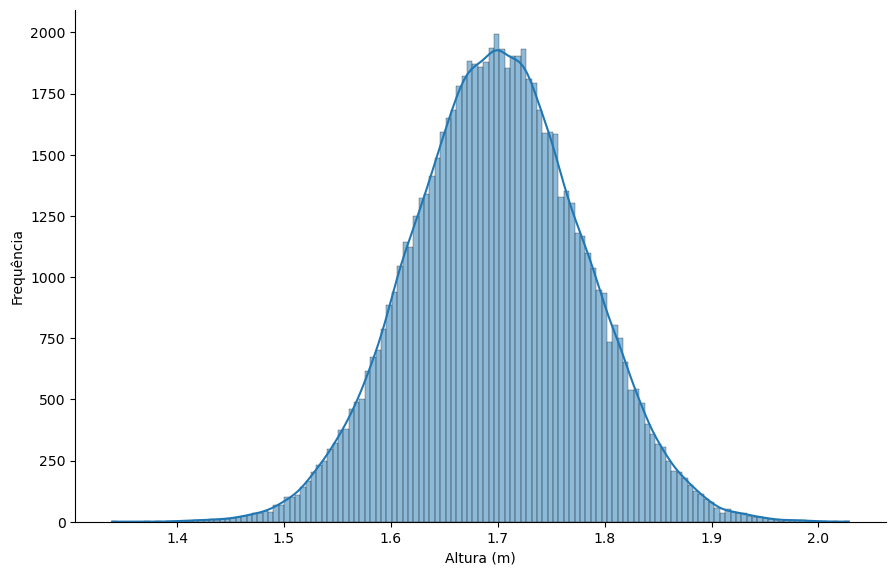

In [162]:
ax = sns.displot(dados.Altura, kde = True)
ax.figure.set_size_inches(10, 6)
ax.set_titles('Distribuição de Alturas', fontsize=16)
ax.set_xlabels('Altura (m)')
ax.set_ylabels('Frequência')
ax

<Axes: >

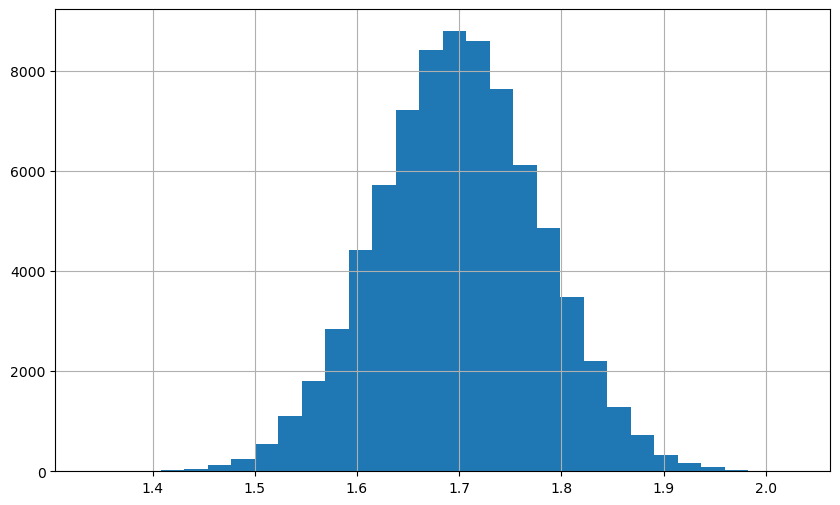

In [165]:
dados.Altura.hist(bins=30, figsize=(10,6))

In [166]:
dist_freq_qualitativas_personalizada

,Frequência,Porcentagem (%)
Classe,,
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


<Axes: xlabel='Classe'>

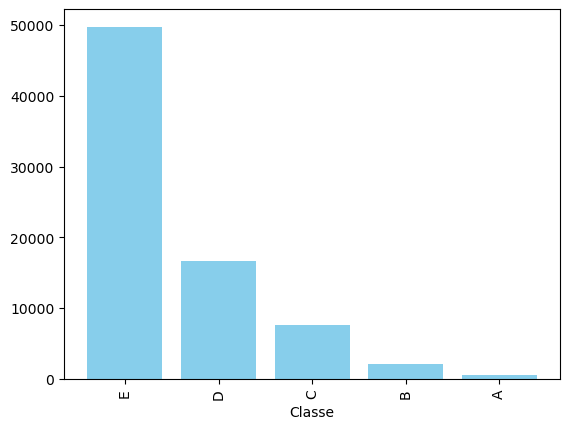

In [168]:
dist_freq_qualitativas_personalizada['Frequência'].plot.bar(width=0.8, color='skyblue')

# <font color=green>3 MEDIDAS DE TENDÊNCIA CENTRAL</font>
***

## DataFrame de exemplo

In [192]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 5, 3, 7, 9], 
                          'Beltrano': [4, 10, 7, 6, 9, 3, 2],
                          'Acreano': [8, 6, 4, 7, 9, 7, 9]},
                  index= ['Matemática', 'Português', 'História', 'Geografia', 'Ciências', 'Inglês', 'Artes'])
df.rename_axis('Disciplinas', axis= 'columns', inplace=True)
df

Disciplinas,Fulano,Beltrano,Acreano
Matemática,8,4,8
Português,10,10,6
História,4,7,4
Geografia,5,6,7
Ciências,3,9,9
Inglês,7,3,7
Artes,9,2,9


## <font color=green>3.1 Média aritmética</font>
***

É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

In [170]:
media = (8+10+4+5+3+7+9)/7
media

6.571428571428571

In [172]:
df['Beltrano'].mean()

6.285714285714286

In [173]:
dados.Renda.mean()

2000.3831988547631

In [176]:
dados.groupby('Sexo')['Renda'].mean()

Sexo
Feminino     1566.847393
Masculino    2192.441596
Name: Renda, dtype: float64

In [179]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})
dataset.groupby('Sexo')['Idade'].mean()


Sexo
H    45.750000
M    46.333333
Name: Idade, dtype: float64

## <font color=green>3.2 Mediana</font>
***

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


# $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Exemplo 1 - n ímpar

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img002.png' width='40%' style="float:left">

In [181]:
notas_fulano = df.Fulano
notas_fulano

Matemática     8
Português     10
História       4
Geografia      5
Ciências       3
Inglês         7
Artes          9
Name: Fulano, dtype: int64

In [182]:
notas_fulano = notas_fulano.sort_values()
notas_fulano

Ciências       3
História       4
Geografia      5
Inglês         7
Matemática     8
Artes          9
Português     10
Name: Fulano, dtype: int64

In [185]:
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Ciências,3
1,História,4
2,Geografia,5
3,Inglês,7
4,Matemática,8
5,Artes,9
6,Português,10


In [186]:
mediana = notas_fulano.Fulano.median()
mediana

7.0

In [187]:
n = notas_fulano.shape[0]
elemento_md = (n +1 ) / 2
notas_fulano.loc[elemento_md -1]

index     Inglês
Fulano         7
Name: 3, dtype: object

### Exemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img003.png' width='50%' style="float:left">

In [194]:
notas_beltrao = df.Beltrano.sample(6, random_state= 101)
notas_beltrao

Matemática     4
História       7
Inglês         3
Ciências       9
Artes          2
Português     10
Name: Beltrano, dtype: int64

In [195]:
#mediana
notas_beltrao.median()

5.5

### Obtendo a mediana em nosso dataset

In [196]:
dados.Renda.median()

1200.0

In [197]:
dados.Renda.quantile()

1200.0

## <font color=green>3.3 Moda</font>
***

Pode-se definir a moda como sendo o valor mais frequente de um conjunto de dados. A moda é bastante utilizada para dados qualitativos.

In [199]:
df.mode()

Disciplinas,Fulano,Beltrano,Acreano
0,3,2,7.0
1,4,3,9.0
2,5,4,NaN
3,7,6,NaN
4,8,7,NaN
5,9,9,NaN
6,10,10,NaN


In [205]:
exemplo = pd.Series([1,1,1,1,1,2,2,2,2,2, 3, 4, 4, 4, 5])
exemplo

0     1
1     1
2     1
3     1
4     1
5     2
6     2
7     2
8     2
9     2
10    3
11    4
12    4
13    4
14    5
dtype: int64

In [206]:
exemplo.mode()

0    1
1    2
dtype: int64

### Obtendo a moda em nosso dataset

In [ ]:
dados.Renda.mode()

## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

### Avaliando a variável RENDA

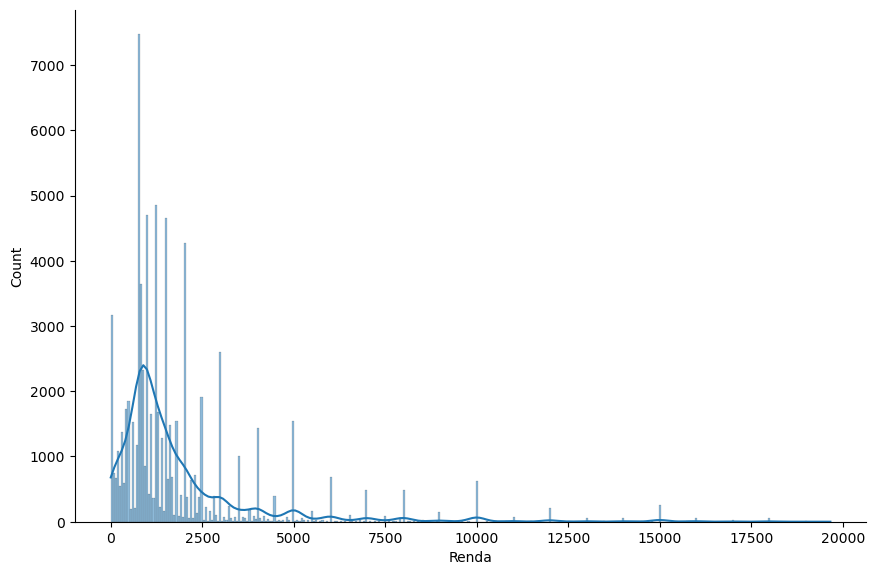

In [212]:
ax = sns.displot(dados.query('Renda < 20000').Renda, kde = True)
ax.figure.set_size_inches(10, 6)
ax

In [214]:
moda = dados.Renda.mode()
moda

0    788
Name: Renda, dtype: int64

In [217]:
mediana = dados.Renda.median()
mediana

1200.0

In [216]:
media = dados.Renda.mean()
media

2000.3831988547631

***

### Avaliando a variável ALTURA

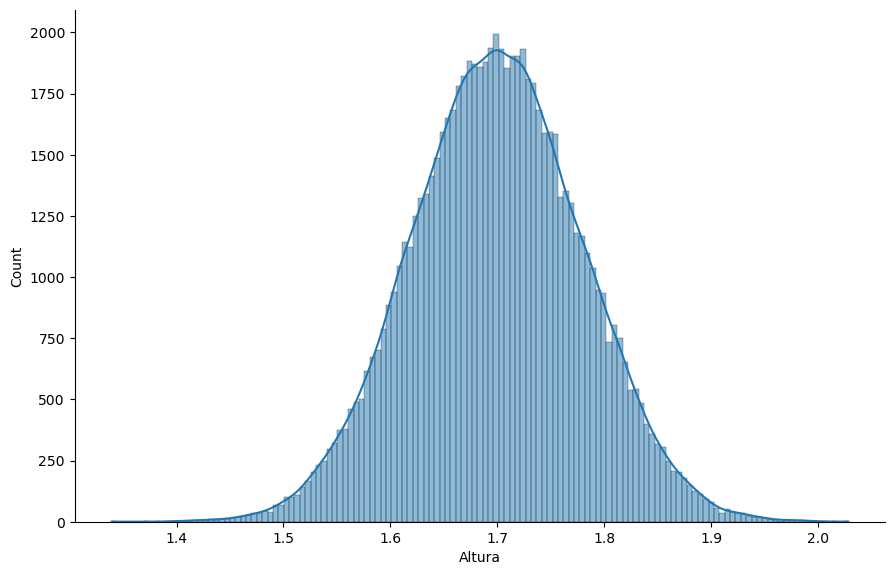

In [218]:
ax = sns.displot(dados.Altura, kde = True)
ax.figure.set_size_inches(10, 6)
ax

In [219]:
moda = dados.Altura.mode()
moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

In [221]:
media = dados.Altura.mean()
media

1.6995124540575741

In [223]:
mediana = dados.Altura.median()
mediana

1.6993247325

***

### Avaliando a variável ANOS DE ESTUDO

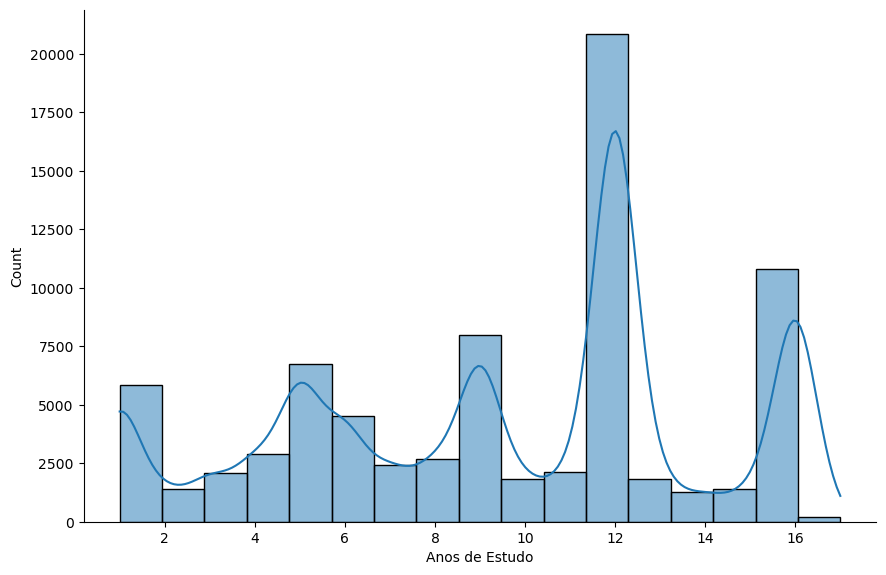

In [224]:
ax = sns.displot(dados['Anos de Estudo'],bins = 17, kde = True)
ax.figure.set_size_inches(10, 6)
ax

In [227]:
moda = dados['Anos de Estudo'].mode()
moda

0    12
Name: Anos de Estudo, dtype: int64

In [226]:
mediana = dados['Anos de Estudo'].median()
mediana

11.0

In [225]:
media = dados['Anos de Estudo'].mean()
media

9.469664237376367

# <font color=green>4 MEDIDAS SEPARATRIZES</font>
***

## <font color=green>4.1 Quartis, decis e percentis</font>
***

Há uma série de medidas de posição semelhantes na sua concepção à mediana, embora não sejam medidas de tendência central. Como se sabe, a mediana divide a distribuição em duas partes iguais quanto ao número de elementos de cada parte. Já os quartis permitem dividir a distribuição em quatro partes iguais quanto ao número de elementos de cada uma; os decis em dez partes e os centis em cem partes iguais.

In [228]:
dados.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [229]:
[i /10 for i in range(1, 10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [230]:
dados.Renda.quantile([i /10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [231]:
dados.Renda.quantile([i /100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

<Axes: title={'center': 'Distribuição de Renda'}, xlabel='Anos', ylabel='Acumulado'>

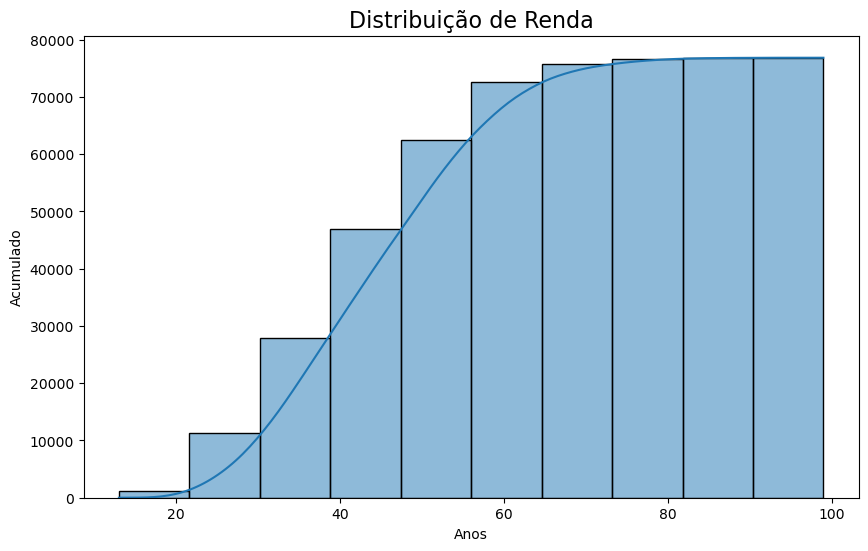

In [239]:
ax = sns.histplot(data=dados, x='Idade', cumulative=True, kde=True, bins=10)
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribuição de Renda', fontsize=16)
ax.set_xlabel('Anos')
ax.set_ylabel('Acumulado')
ax

In [238]:
dados.Idade.quantile([i /10 for i in range(1, 10)])

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: Idade, dtype: float64

## <font color=green>4.2 Box-plot</font>
***

O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='65%'>

<Axes: title={'center': 'Altura'}, xlabel='Metros'>

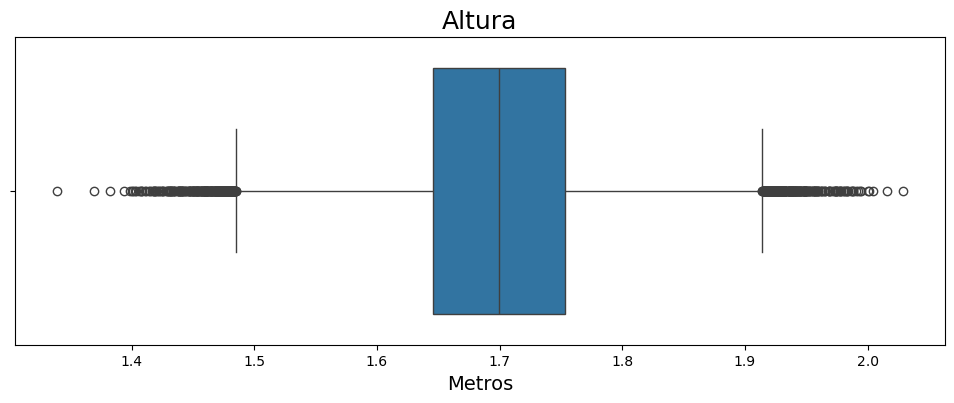

In [240]:
ax = sns.boxplot( x = 'Altura', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: title={'center': 'Altura'}, xlabel='Metros', ylabel='Sexo'>

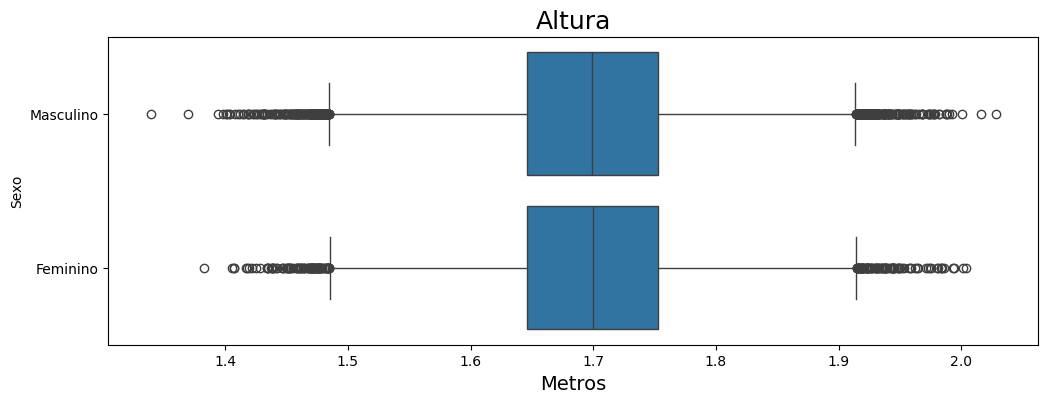

In [241]:
ax = sns.boxplot( x = 'Altura', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$'>

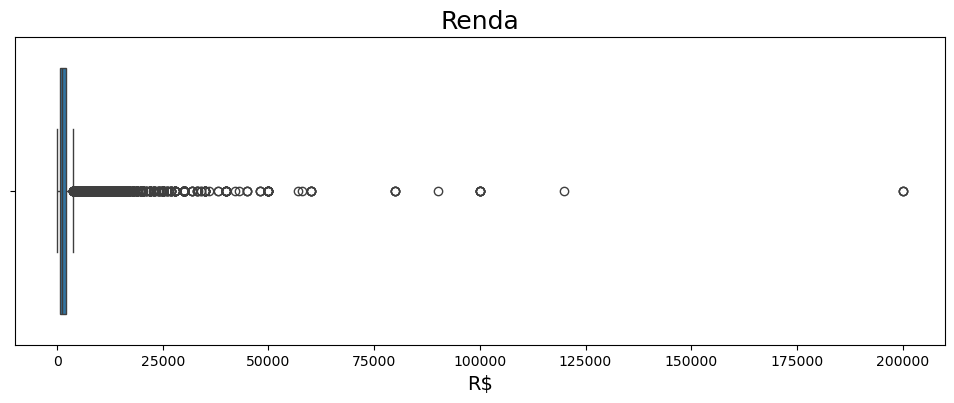

In [242]:
ax = sns.boxplot( x = 'Renda', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$'>

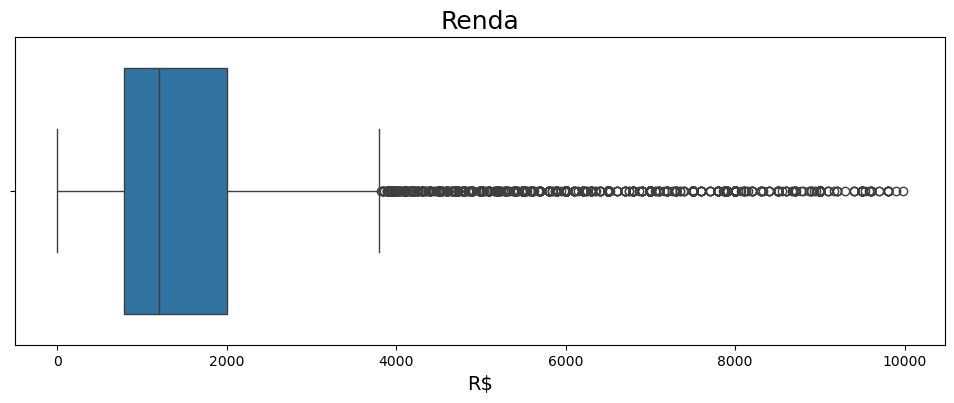

In [243]:
ax = sns.boxplot( x = 'Renda', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Sexo'>

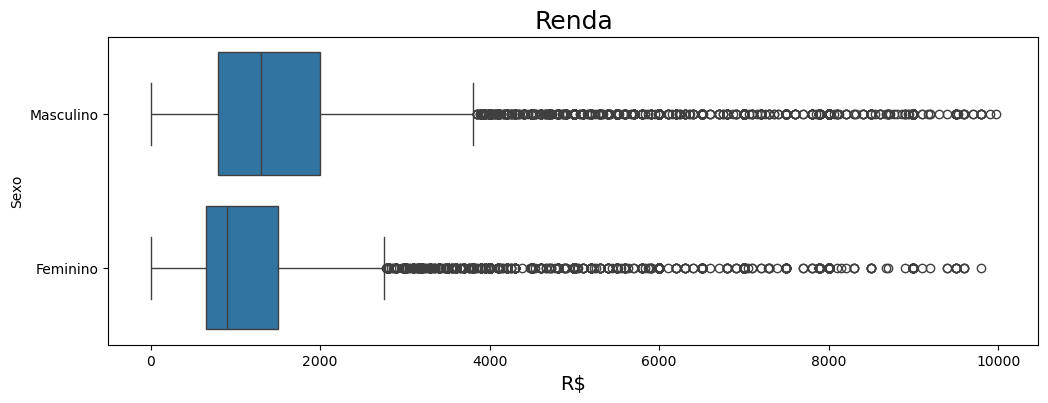

In [244]:
ax = sns.boxplot( x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<Axes: title={'center': 'Anos de Estudo'}, xlabel='Anos'>

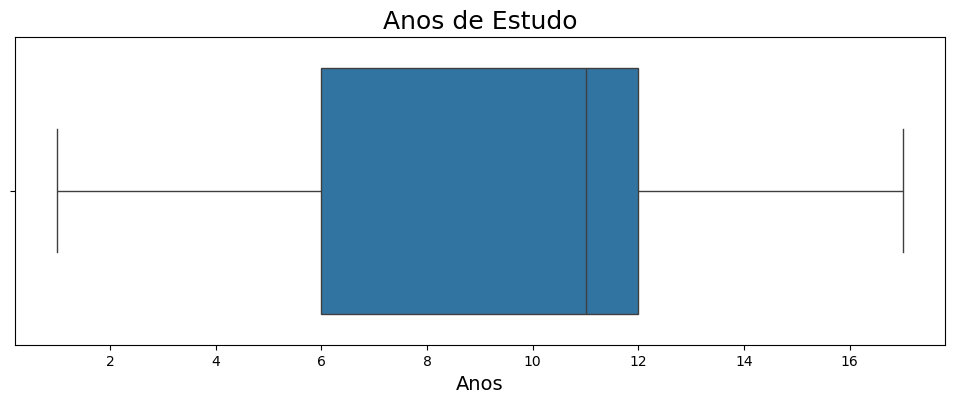

In [245]:
ax = sns.boxplot( x = 'Anos de Estudo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

<Axes: title={'center': 'Anos de Estudo'}, xlabel='Anos', ylabel='Sexo'>

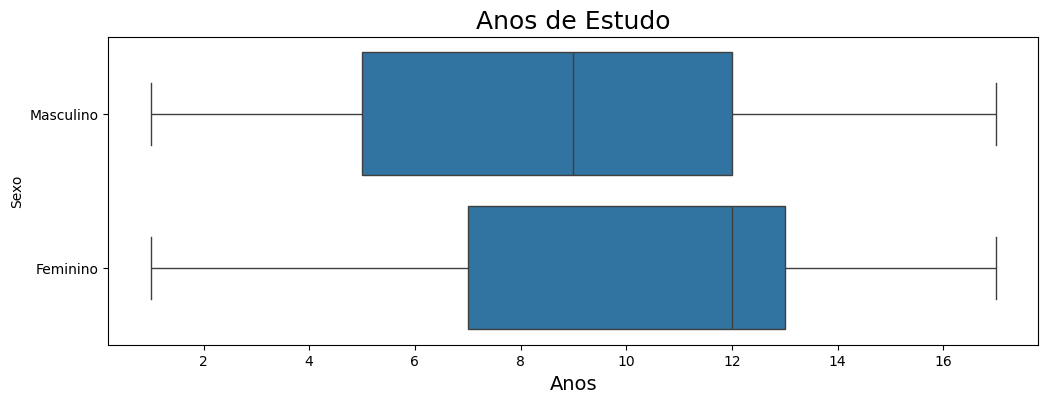

In [246]:
ax = sns.boxplot( x = 'Anos de Estudo', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

<Axes: title={'center': 'Renda (R$) - Bahia X São Paulo'}, xlabel='R$', ylabel='UF'>

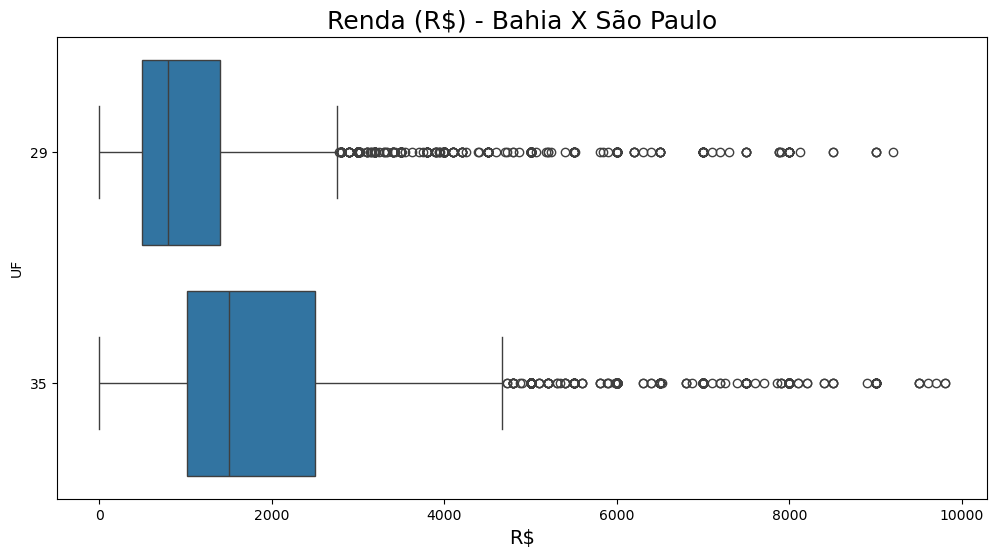

In [247]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('(UF==35 or UF==29) and Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(12, 6)
ax.set_title('Renda (R$) - Bahia X São Paulo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

# <font color=green>5 MEDIDAS DE DISPERSÃO</font>
***

Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

## <font color=green>5.1 Desvio médio absoluto</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


In [249]:
df.mean()

Disciplinas
Fulano      6.571429
Beltrano    5.857143
Acreano     7.142857
dtype: float64

In [250]:
df

Disciplinas,Fulano,Beltrano,Acreano
Matemática,8,4,8
Português,10,10,6
História,4,7,4
Geografia,5,6,7
Ciências,3,9,9
Inglês,7,3,7
Artes,9,2,9


In [251]:
df.median()

Disciplinas
Fulano      7.0
Beltrano    6.0
Acreano     7.0
dtype: float64

In [253]:
notas_fulano = df[['Fulano']]
notas_fulano

Disciplinas,Fulano
Matemática,8
Português,10
História,4
Geografia,5
Ciências,3
Inglês,7
Artes,9


In [254]:
nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

C:\Users\henri\AppData\Local\Temp\ipykernel_19976\28910292.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nota_media_fulano = notas_fulano.mean()[0]


6.571428571428571

In [255]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

C:\Users\henri\AppData\Local\Temp\ipykernel_19976\349761232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano


Disciplinas,Fulano,Desvio
Matemática,8,1.428571
Português,10,3.428571
História,4,-2.571429
Geografia,5,-1.571429
Ciências,3,-3.571429
Inglês,7,0.428571
Artes,9,2.428571


In [256]:
notas_fulano['Desvio'].sum()

1.7763568394002505e-15

In [257]:
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
notas_fulano

Disciplinas,Fulano,Desvio,|Desvio|
Matemática,8,1.428571,1.428571
Português,10,3.428571,3.428571
História,4,-2.571429,2.571429
Geografia,5,-1.571429,1.571429
Ciências,3,-3.571429,3.571429
Inglês,7,0.428571,0.428571
Artes,9,2.428571,2.428571


C:\Users\henri\AppData\Local\Temp\ipykernel_19976\2511693947.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.vlines(x = i, ymin = nota_media_fulano, ymax = notas_fulano['Fulano'][i], linestyle='dashed')


<Axes: >

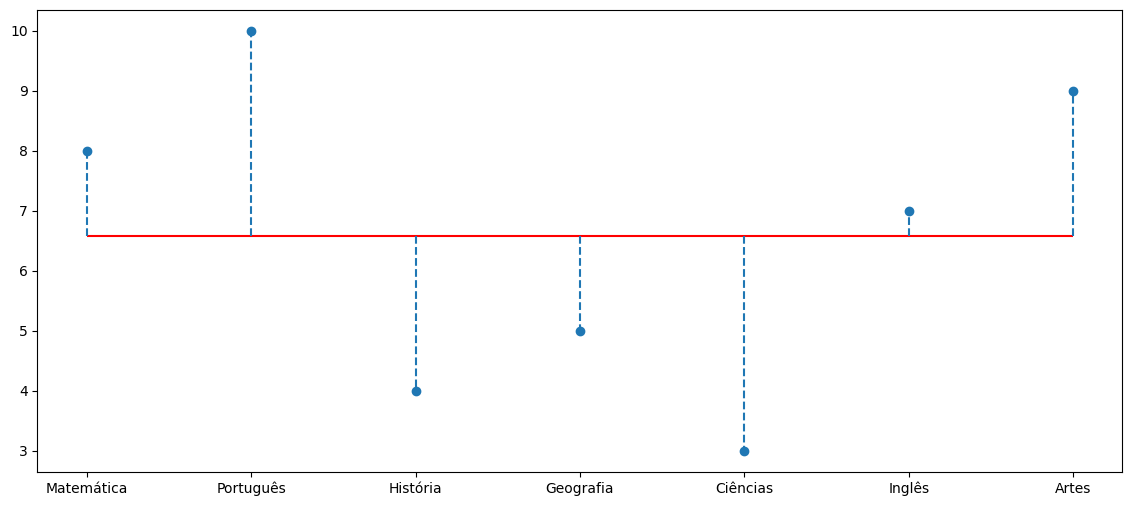

In [258]:
ax = notas_fulano['Fulano'].plot(style = 'o')
ax.figure.set_size_inches(14, 6)
ax.hlines(y = nota_media_fulano, xmin = 0, xmax = notas_fulano.shape[0] - 1, colors = 'red')
for i in range(notas_fulano.shape[0]):
    ax.vlines(x = i, ymin = nota_media_fulano, ymax = notas_fulano['Fulano'][i], linestyle='dashed')
ax

In [264]:
desvio_medio_absoluto_2 = notas_fulano["|Desvio|"].mean()
desvio_medio_absoluto_2

2.2040816326530615

In [265]:
desvio_medio_absoluto_2 = abs(notas_fulano['Fulano'] - notas_fulano['Fulano'].mean()).mean()
desvio_medio_absoluto_2

2.2040816326530615

In [263]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]}, 
                  index = ['Matemática', 
                           'Português', 
                           'Inglês', 
                           'Geografia', 
                           'História', 
                           'Física', 
                           'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Sicrano
Matemática,8,7.5
Português,10,8.0
Inglês,4,7.0
Geografia,8,8.0
História,6,8.0
Física,10,8.5
Química,8,7.0


## <font color=green>5.2 Variância</font>
***

### Variância

A variância é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado.

### Variância populacional

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Variância amostral

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

In [266]:
notas_fulano['(Desvio)^2'] = notas_fulano['Desvio'].pow(2)
notas_fulano

Disciplinas,Fulano,Desvio,|Desvio|,(Desvio)^2
Matemática,8,1.428571,1.428571,2.040816
Português,10,3.428571,3.428571,11.755102
História,4,-2.571429,2.571429,6.612245
Geografia,5,-1.571429,1.571429,2.469388
Ciências,3,-3.571429,3.571429,12.755102
Inglês,7,0.428571,0.428571,0.183673
Artes,9,2.428571,2.428571,5.897959


Para calcularmos a variância amostral na célula seguinte, adicionaremos notas_fulano[] com o desvio ao quadrado. Se aplicarmos direto a média mean() como fizemos anteriormente, o sistema usará o "n" como denominador, e queremos utilizar "n - 1".

In [267]:
notas_fulano['(Desvio)^2'].sum() / (len(notas_fulano) - 1)

6.9523809523809526

In [268]:
variancia = notas_fulano['Fulano'].var()
variancia

6.9523809523809526

## <font color=green>5.3 Desvio padrão</font>
***

Uma das restrições da variância é o fato de fornecer medidas em quadrados das unidades originais - a variância de medidas de comprimento, por exemplo, é em unidades de área. Logo, o fato de as unidades serem diferentes dificulta a comparação da dispersão com as variáveis que a definem. Um modo de eliminar essa dificuldade é considerar sua raiz quadrada.

### Desvio padrão populacional

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

### Desvio padrão amostral

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

Isso faz com que a unidade de medida desta Estatística Descritiva seja elevada ao quadrado também. Como no exemplo passado da Altura em metros, sua variância estará em "m²", o que dificultará a interpretação.

Já no caso do desvio padrão, pegaremos o valor da variância, faremos sua raiz quadrada e resolveremos o problema da unidade de medida, voltando a ser em metros.

Portanto, calcularemos a variância e compararemos com o df de exemplo.

O Numpy np possui uma função matemática sqrt() que tira a raiz quadrada da variancia.

In [269]:
np.sqrt(variancia)

2.63673679998231

In [270]:
desvio_padrao = notas_fulano['Fulano'].std()
desvio_padrao

2.63673679998231

In [271]:
df.std()

Matérias
Fulano     2.138090
Sicrano    0.566947
dtype: float64

In [275]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})
dataset.groupby('Sexo')['Idade'].std()

#DESVIO PADRÃO DA IDADE
#desvio_padrao = dataset['Idade'].std()


Sexo
H    11.898879
M    16.645320
Name: Idade, dtype: float64